In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pathlib

Here we iterate over all of the output files.
Each file corresponds to a single run of the model for T=2880 steps.
We run each model M=10 times for each norm.

for each run we take the results of the final step to see the state of the population.
As they did in the article, the retults for each norm are summed. so for each norm the final state of the population is M*N

In [11]:
datasets = []
full_datasets = []

for file in pathlib.Path('../my_results').iterdir():
    if 'agent_vars' not in str(file):
        continue
    dataset = pd.read_csv(str(file), delimiter=";")
    run_parameters = file.name.split('_')[-2]
    run_id = int(run_parameters.split(':')[0])
    norm_ids = f'({", ".join(run_parameters.split(":")[1].split("-"))})'
    dataset['RunId'] = run_id
    dataset['norms_ind'] = str(norm_ids)
    datasets.append(dataset.loc[dataset['Step'] == dataset['Step'].max()])
    full_datasets.append(dataset)

cluster = pd.concat(datasets)
cluster.reset_index(drop=True, inplace=True)
full_cluster = pd.concat(full_datasets)
full_cluster.reset_index(drop=True, inplace=True)

cluster

,Step,AgentID,physiological,safety,belonging,esteem,wealth,actions,status,RunId,norms_ind
0,2879,0,"[1.0, 0.92, 1.0, 0.674404086784]","[1.0, 0.995, 0.999, 1.0]","[1.0, 0.97, 0.98]","[1.0, 0.99, 0.99]",2180.650000,go_grocery,retired,3,(2)
1,2879,1,"[0.3112736041096812, 1.0, 1.0, 0.9993]","[1.0, 1.0, 1.0, 0.991]","[0.6117558552698804, 1.0, 1.0]","[1.0, 1.0, 1.0]",0.000000,go_home,unemployed,3,(2)
2,2879,2,"[0.6480904940106315, 1.0, 1.0, 0.5844206322198...","[1.0, 1.0, 1.0, 0.9218555832902952]","[1.0, 1.0, 0.5777172448035517]","[1.0, 1.0, 0.34307060798583655]",1004.000000,go_leisure,student,3,(2)
3,2879,3,"[1.0, 0.9025, 1.0, 1.0]","[1.0, 0.998001, 0.99840064, 1.0]","[1.0, 0.7224999999999999, 0.9603999999999999]","[1.0, 0.9801, 0.9603999999999999]",2183.900000,go_home,employed,3,(2)
4,2879,4,"[1.0, 0.95, 1.0, 1.0]","[1.0, 0.999, 0.9992, 1.0]","[1.0, 0.85, 0.98]","[1.0, 0.99, 0.98]",3320.975000,go_grocery,employed,3,(2)
...,...,...,...,...,...,...,...,...,...,...,...
5995,2879,95,"[0.5782399381250609, 1.0, 1.0, 0.681472]","[1.0, 1.0, 1.0, 0.994011992]","[0.5079237760000002, 1.0, 1.0]","[1.0, 1.0, 1.0]",2315.125000,go_home,retired,0,()
5996,2879,96,"[0.23497028557383937, 1.0, 1.0, 0.994014980014...","[0.9898432518651961, 1.0, 1.0, 0.9703725093562...","[0.5678692520410001, 1.0, 1.0]","[0.9414801494009999, 1.0, 1.0]",0.000000,go_reception_center,homeless,0,()
5997,2879,97,"[0.6785824928222027, 0.9025, 1.0, 0.6366902540...","[1.0, 0.986049, 0.994009, 0.9218555832902952]","[1.0, 0.7224999999999999, 0.47013630822564484]","[1.0, 0.9801, 0.21964868701775178]",986.000000,go_leisure,student,0,()
5998,2879,98,"[1.0, 0.95, 1.0, 1.0]","[1.0, 0.999, 0.9992, 1.0]","[1.0, 0.85, 0.98]","[1.0, 0.99, 0.98]",4579.591667,go_grocery,employed,0,()


()


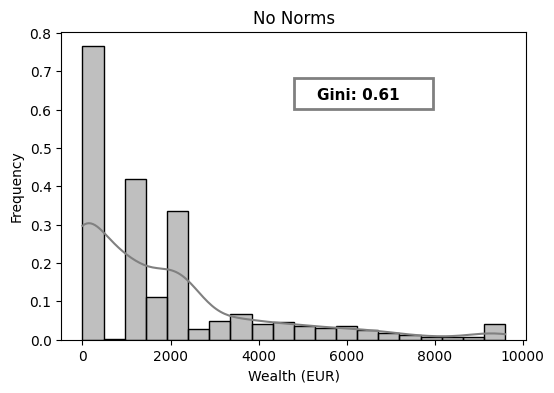

In [37]:

desired_order = ['()']
combination_labels = ['No Norms']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
colors = ['grey']

gini_coefficients = []

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order[:1]):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    print(combination)
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth'])
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)
    
    

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs, stat='frequency', kde=True)
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the colored square with Gini coefficient text
    axs.text(0.55, 0.78, f'Gini: {gini_coefficient:.2f}', weight='bold', fontsize=11, transform=axs.transAxes)
    square_color = colors[i]
    frame = plt.Rectangle((0.5, 0.75), 0.3, 0.10, fill=False, edgecolor=square_color, linewidth=2, transform=axs.transAxes)
    axs.add_patch(frame)
    
    axs.set_xlabel('Wealth (EUR)')
    axs.set_ylabel('Frequency')
    axs.set_title(f'{combination_labels[i]}')

plt.show()


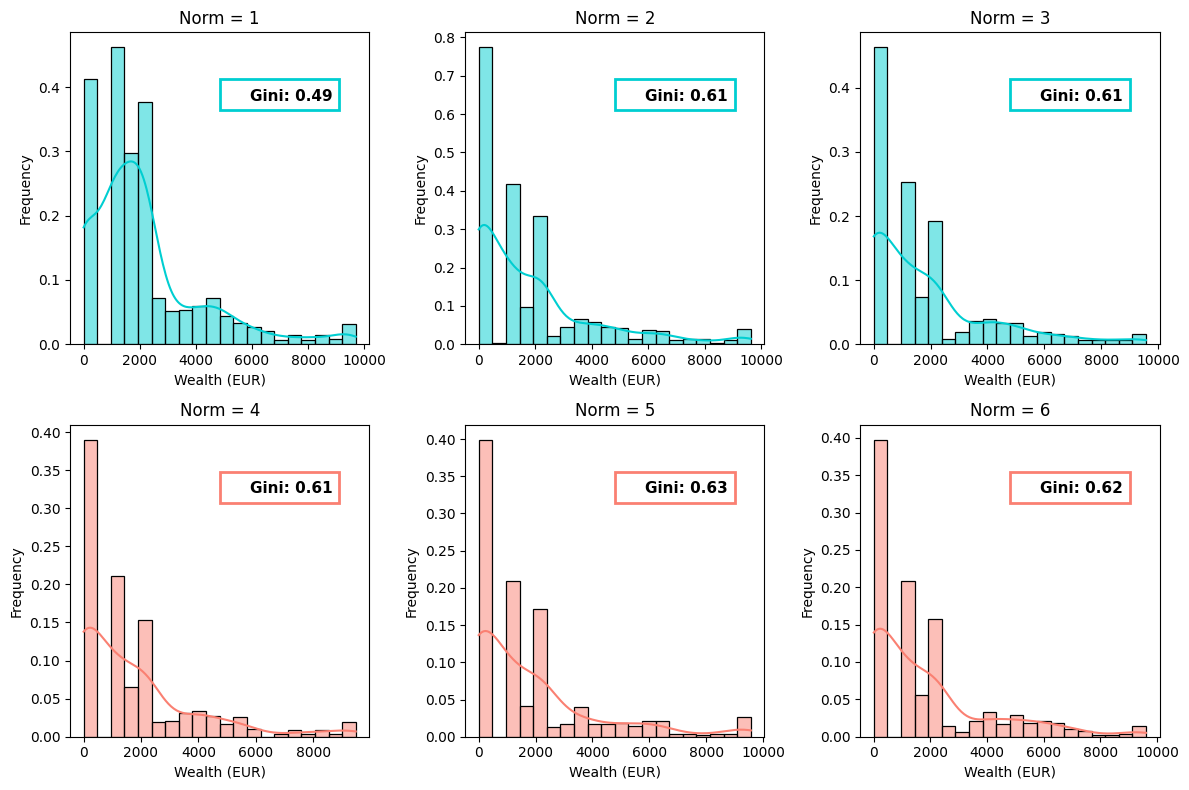

In [38]:

desired_order = [ '(0)', '(1)', '(2)' ,'(3)', '(4)', '(5)'] #'()',
combination_labels = ['1', '2', '3', '4', '5', '6']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
colors = ['darkturquoise', 'darkturquoise', 'darkturquoise', 'salmon', 'salmon', 'salmon']  #'salmon', 'darkturquoise']   #plt.cm.Set1(np.linspace(0, 1, len(desired_order)))

gini_coefficients = []

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order[:6]):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    row = i // 3
    col = i % 3
    
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth']) #Order de petit a gran
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs[row, col], stat='frequency', kde=True)
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the rugplot lines for the rest of the wealth distribution in black
    #sns.rugplot(data=filtered_data, x='wealth', color='black', ax=axs[row, col], linewidth=0.5)
    
    # Plot the rugplot line for the wealth values of homeless agents in red and larger size
    #sns.rugplot(data=homeless_wealth, color='red', ax=axs[row, col], linewidth=1.5, height=0.05)
    # Plot the colored square with Gini coefficient text
    axs[row, col].text(0.6, 0.78, f'Gini: {gini_coefficient:.2f}', weight = 'bold', fontsize = 11, transform=axs[row, col].transAxes)
    square_color = colors[i]
    frame = plt.Rectangle((0.5, 0.75), 0.4, 0.10, fill=False, edgecolor=square_color, linewidth=2, transform=axs[row, col].transAxes)
    axs[row, col].add_patch(frame)
    
    axs[row, col].set_xlabel('Wealth (EUR)')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Norm = {combination_labels[i]}')
    #axs[row, col].text(0.6, 0.8, f'Gini: {gini_coefficient:.2f}', transform=axs[row, col].transAxes)
    
#fig.suptitle('Wealth Distributions for subsets of Individual Norms')
plt.tight_layout()
plt.show()

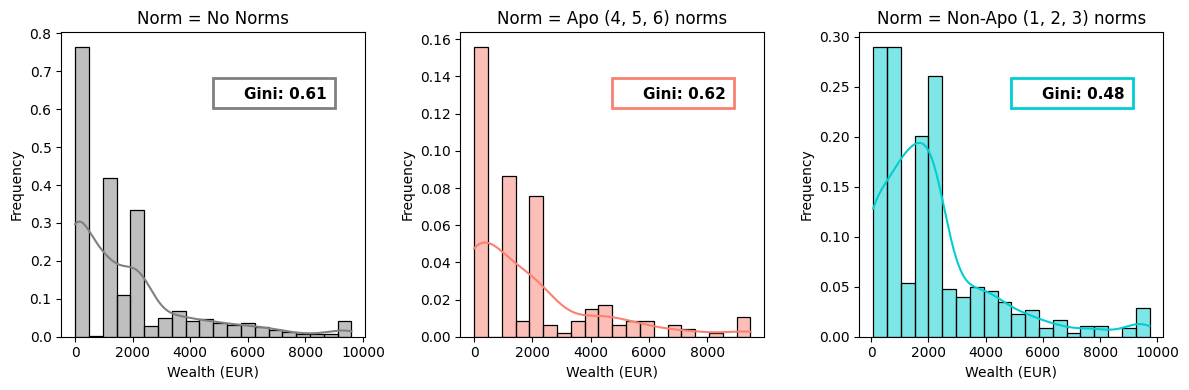

In [35]:
desired_order = [ '()', '(3, 4, 5)', '(0, 1, 2)'] #'()',
combination_labels = ['No Norms', 'Apo (4, 5, 6) norms', 'Non-Apo (1, 2, 3) norms']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
colors = ['grey', 'salmon', 'darkturquoise']  #'salmon', 'darkturquoise']   #plt.cm.Set1(np.linspace(0, 1, len(desired_order)))

gini_coefficients = []

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order[:3]):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    row = 0
    col = i % 3
    
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth']) #Order de petit a gran
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs[col], stat='frequency', kde=True)
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the rugplot lines for the rest of the wealth distribution in black
    #sns.rugplot(data=filtered_data, x='wealth', color='black', ax=axs[row, col], linewidth=0.5)
    
    # Plot the rugplot line for the wealth values of homeless agents in red and larger size
    #sns.rugplot(data=homeless_wealth, color='red', ax=axs[row, col], linewidth=1.5, height=0.05)
    # Plot the colored square with Gini coefficient text
    axs[col].text(0.6, 0.78, f'Gini: {gini_coefficient:.2f}', weight = 'bold', fontsize = 11, transform=axs[col].transAxes)
    square_color = colors[i]
    frame = plt.Rectangle((0.5, 0.75), 0.4, 0.10, fill=False, edgecolor=square_color, linewidth=2, transform=axs[col].transAxes)
    axs[col].add_patch(frame)
    
    axs[col].set_xlabel('Wealth (EUR)')
    axs[col].set_ylabel('Frequency')
    axs[col].set_title(f'{combination_labels[i]}')
    #axs[row, col].text(0.6, 0.8, f'Gini: {gini_coefficient:.2f}', transform=axs[row, col].transAxes)
    
#fig.suptitle('Wealth Distributions for subsets of Individual Norms')
plt.tight_layout()
plt.show()

This is a histogram of chosen actions:

False


<AxesSubplot: ylabel='Count'>

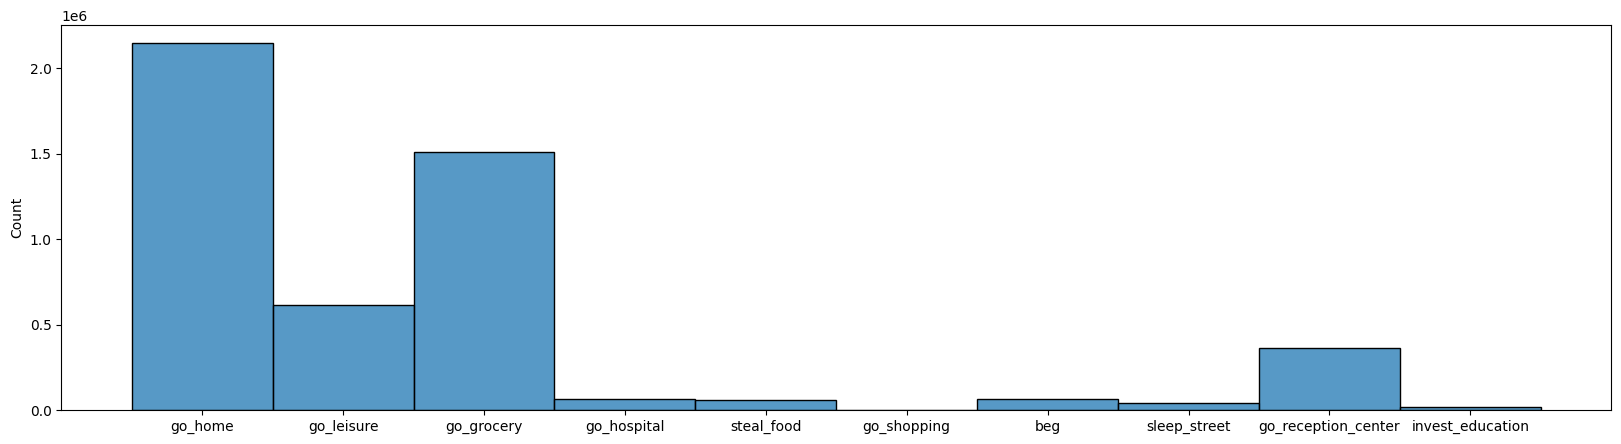

In [39]:
filtered_data = full_cluster.query(f'RunId == 0')
actions = list(full_cluster.query(f'RunId == 0')['actions'])

print('go_work' in actions) # I think it is a bug, actions which are called directly don't show in the results
    
plt.figure(figsize=(20,5))
sns.histplot(data=actions, bins=20)